In [ ]:
pip install matplotlib --user --no-warn-script-location
pip install os
pip install keras
pip install tensorflow
pip install scikit-learn
pip install sklearn --user --no-warn-script-location
pip install tqdm --user --no-warn-script-location

In [1]:
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle
import urllib.request
import zipfile
from glob import glob
import IPython.display as ipd
from tqdm import tqdm
import librosa
import librosa.display
from sklearn.metrics import classification_report

Run the following cell to check that the folder contains the file 'features_30_sec.csv':

In [2]:
sample_path = 'C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\features_30_sec.csv'
files = glob(sample_path)
len(files)


1

In [3]:
df = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\features_30_sec.csv')

df_blues = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\blues.csv')

df_classical = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\classical.csv')

df_country = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\country.csv')

df_disco = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\disco.csv')

df_hiphop = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\hiphop.csv')

df_rock = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\rock.csv')

df_jazz = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\jazz.csv')

df_metal = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\metal.csv')

df_pop = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\pop.csv')

df_reggae = pd.read_csv('C:\\Users\\sharf\\deep-learning-music-genre-classification\\Data\\reggae.csv')

In [4]:
df_blues.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
df_blues.shape

(100, 60)

In [6]:
y_blues=df_blues['label']
y_classical=df_classical['label']
y_country=df_country['label']
y_disco=df_disco['label']
y_hiphop=df_hiphop['label']
y_rock=df_rock['label']
y_jazz=df_jazz['label']
y_metal=df_metal['label']
y_pop=df_pop['label']
y_reggae=df_reggae['label']

In [7]:
X_blues=df_blues.drop(['label','filename','length'],axis=1)
X_classical=df_classical.drop(['label','filename','length'],axis=1)
X_country=df_country.drop(['label','filename','length'],axis=1)
X_disco=df_disco.drop(['label','filename','length'],axis=1)
X_hiphop=df_hiphop.drop(['label','filename','length'],axis=1)
X_rock=df_rock.drop(['label','filename','length'],axis=1)
X_jazz=df_jazz.drop(['label','filename','length'],axis=1)
X_metal=df_metal.drop(['label','filename','length'],axis=1)
X_pop=df_pop.drop(['label','filename','length'],axis=1)
X_reggae=df_reggae.drop(['label','filename','length'],axis=1)

In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [9]:
X_train_blues, X_test_blues, y_train_blues, y_test_blues = train_test_split(X_blues,y_blues,test_size=0.2,random_state = 123)
X_train_blues.shape, X_test_blues.shape, y_train_blues.shape, y_test_blues.shape

X_train_classical, X_test_classical, y_train_classical, y_test_classical = train_test_split(X_classical,y_classical,test_size=0.2,random_state = 123)

X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_country,y_country,test_size=0.2,random_state = 123)

X_train_disco, X_test_disco, y_train_disco, y_test_disco = train_test_split(X_disco,y_disco,test_size=0.2,random_state = 123)

X_train_hiphop, X_test_hiphop, y_train_hiphop, y_test_hiphop = train_test_split(X_hiphop,y_hiphop,test_size=0.2,random_state = 123)

X_train_rock, X_test_rock, y_train_rock, y_test_rock = train_test_split(X_rock,y_rock,test_size=0.2,random_state = 123)

X_train_jazz, X_test_jazz, y_train_jazz, y_test_jazz = train_test_split(X_jazz,y_jazz,test_size=0.2,random_state = 123)

X_train_metal, X_test_metal, y_train_metal, y_test_metal = train_test_split(X_metal,y_metal,test_size=0.2,random_state = 123)

X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(X_pop,y_pop,test_size=0.2,random_state = 123)

X_train_reggae, X_test_reggae, y_train_reggae, y_test_reggae = train_test_split(X_reggae,y_reggae,test_size=0.2,random_state = 123)

In [10]:
X_train = pd.concat([X_train_blues,X_train_classical,X_train_country,X_train_disco,X_train_hiphop,X_train_rock,X_train_jazz,X_train_metal,X_train_pop,X_train_reggae],axis=0)

y_train = pd.concat([y_train_blues,y_train_classical,y_train_country,y_train_disco,y_train_hiphop,y_train_rock,y_train_jazz,y_train_metal,y_train_pop,y_train_reggae],axis=0)

In [11]:
X_train.shape

(800, 57)

In [12]:
y_train.shape

(800,)

In [13]:
X_test = pd.concat([X_test_blues,X_test_classical,X_test_country,X_test_disco,X_test_hiphop,X_test_rock,X_test_jazz,X_test_metal,X_test_pop,X_test_reggae],axis=0)

y_test = pd.concat([y_test_blues,y_test_classical,y_test_country,y_test_disco,y_test_hiphop,y_test_rock,y_test_jazz,y_test_metal,y_test_pop,y_test_reggae],axis=0)

In [14]:
X_test.shape

(200, 57)

In [15]:
y_test.shape

(200,)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [17]:
#Data scaled using MinMaxScaler
X_train_scaled

array([[0.22225264, 0.81809875, 0.42807126, ..., 0.15279453, 0.        ,
        0.08167394],
       [0.40802163, 0.75890541, 0.34827339, ..., 0.10098999, 0.56815629,
        0.10607778],
       [0.15788586, 0.80885963, 0.23525344, ..., 0.20581037, 0.44094004,
        0.11832001],
       ...,
       [0.50699908, 0.74417499, 0.3425599 , ..., 0.17153676, 0.48177967,
        0.11951984],
       [0.45098941, 0.71968578, 0.22140368, ..., 0.14750982, 0.57771129,
        0.10644901],
       [0.43143452, 0.76394107, 0.31548853, ..., 0.12294921, 0.57002861,
        0.07011385]])

In [21]:
#StandardScaler performed better in terms of accuracy

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


# scaler=StandardScaler()
# scaler.fit(bank_scale[feature_scale])

In [19]:
#Data scaled using StandardScaler
X_train_scaled

array([[-1.08785636e+00,  1.31651741e+00,  6.85171359e-01, ...,
        -2.61543068e-01, -4.90020363e+00, -4.84949942e-01],
       [-5.88820348e-04,  8.32138254e-01,  2.05552282e-01, ...,
        -6.59588361e-01,  3.32040421e-01, -2.17541220e-01],
       [-1.46458179e+00,  1.24091373e+00, -4.73745519e-01, ...,
         1.45809331e-01, -8.39514859e-01, -8.33951999e-02],
       ...,
       [ 5.78705687e-01,  7.11599159e-01,  1.71211816e-01, ...,
        -1.17535325e-01, -4.63416002e-01, -7.02478170e-02],
       [ 2.50892696e-01,  5.11203961e-01, -5.56988475e-01, ...,
        -3.02148660e-01,  4.20033973e-01, -2.13473394e-01],
       [ 1.36441944e-01,  8.73345008e-01,  8.50137431e-03, ...,
        -4.90862553e-01,  3.49282866e-01, -6.11621415e-01]])

# SVM 

In [30]:
#  min max scaler
model  = svm.SVC(C=1)   
model.fit(X_train_scaled,y_train)

yt_p = model.predict(X_train_scaled)
yv_p = model.predict(X_test_scaled)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Test  Accuracy', np.mean(yv_p==y_test))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.77
Test  Accuracy 0.675
The support vectors are (703, 57)


In [20]:
#using standard scaler
model  = svm.SVC(C=1)   
model.fit(X_train_scaled,y_train)

yt_p = model.predict(X_train_scaled)
yv_p = model.predict(X_test_scaled)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Test  Accuracy', np.mean(yv_p==y_test))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.885
Test  Accuracy 0.75
The support vectors are (701, 57)


# SVM with Hyper parameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.01,0.1,0.2,0.3,0.4,0.5,0.7, 1, 10, 100, 1000],
              'gamma': [10,5,4,3,2,1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
[CV 1/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.369 total time=   0.1s
[CV 2/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.294 total time=   0.1s
[CV 3/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.531 total time=   0.1s
[CV 4/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.463 total time=   0.1s
[CV 5/5] END ......C=0.01, gamma=10, kernel=rbf;, score=0.338 total time=   0.1s
[CV 1/5] END .......C=0.01, gamma=5, kernel=rbf;, score=0.306 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=5, kernel=rbf;, score=0.256 total time=   0.1s
[CV 3/5] END .......C=0.01, gamma=5, kernel=rbf;, score=0.494 total time=   0.1s
[CV 4/5] END .......C=0.01, gamma=5, kernel=rbf;, score=0.431 total time=   0.1s
[CV 5/5] END .......C=0.01, gamma=5, kernel=rbf;, score=0.300 total time=   0.1s
[CV 1/5] END .......C=0.01, gamma=4, kernel=rbf;, score=0.219 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=4, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1, 10, 100,
                               1000],
                         'gamma': [10, 5, 4, 3, 2, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
import pickle
pick1 = {
    'norma':scaler,
    'svmp':svm,
    'lgn':lookup_genre_name
}
pickle.dump( pick1, open( 'models' + ".p", "wb" ) )

In [ ]:
d1 =np.array(a)
data1 = scaler.transform([d1])
genre_prediction = clf.predict(data1)
print(lookup_genre_name[genre_prediction[0]])

In [ ]:
df['class_name'].unique()

In [ ]:
lookup_genre_name dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

In [22]:
# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_scaled)
grid_predictions1 = grid.predict(X_train_scaled) 


print('Training Accuracy', np.mean(grid_predictions1 == y_train))
print('Validation Accuracy', np.mean(grid_predictions == y_test))


# print classification report
print(classification_report(y_train, grid_predictions1))
print(classification_report(y_test, grid_predictions))





{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy 0.99125
Validation Accuracy 0.755
              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        80
   classical       1.00      1.00      1.00        80
     country       1.00      1.00      1.00        80
       disco       0.99      0.99      0.99        80
      hiphop       1.00      0.97      0.99        80
        jazz       1.00      1.00      1.00        80
       metal       0.96      0.99      0.98        80
         pop       1.00      1.00      1.00        80
      reggae       1.00      0.97      0.99        80
        rock       0.96      0.99      0.98        80

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

              precision    recall  f1-score   support

       blues       0.75      0.75      0.75        20
   classical       0.95      0.95     

Compare the training and validation accuracies. Is our model overfitting, underfitting, performing well? What do you think the accuracy of a random classifier would be?

Let's normalise the predictors, to see if the performance improves.


# KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn = knn.fit(X_train_scaled, y_train)


yt_pred1 = knn.predict(X_train_scaled)
yv_pred1 = knn.predict(X_test_scaled)

print('Training Accuracy', np.mean(yt_pred1 == y_train))
print('Validation Accuracy', np.mean(yv_pred1 == y_test))

print("clssification report : ")
print(classification_report(y_test, yv_pred1))

Training Accuracy 0.6725
Validation Accuracy 0.58
clssification report : 
              precision    recall  f1-score   support

       blues       0.91      0.50      0.65        20
   classical       0.90      0.95      0.93        20
     country       0.35      0.60      0.44        20
       disco       0.35      0.60      0.44        20
      hiphop       0.64      0.45      0.53        20
        jazz       1.00      0.50      0.67        20
       metal       0.70      0.70      0.70        20
         pop       0.70      0.80      0.74        20
      reggae       0.53      0.40      0.46        20
        rock       0.33      0.30      0.32        20

    accuracy                           0.58       200
   macro avg       0.64      0.58      0.59       200
weighted avg       0.64      0.58      0.59       200



# KNN Classifier with hyper parameter 

In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {'n_neighbors' : [i for i in range(50)]}
 
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=0;, score=nan total time=   0.0s
[CV 1/5] END .....................n_neighbors=1;, score=0.619 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.662 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.719 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.619 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.719 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.581 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                         22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=3)

In [25]:
print(grid.best_params_)
grid_predictions_T = grid.predict(X_train_scaled)
grid_predictions = grid.predict(X_test_scaled)

print('Training Accuracy', np.mean(grid_predictions_T == y_train))
print('Validation Accuracy', np.mean(grid_predictions == y_test))

{'n_neighbors': 4}
Training Accuracy 0.8175
Validation Accuracy 0.7


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
print('Training accuracy: {0}.'.format(knn.score(X_train_scaled, y_train)))
print('Validation accuracy: {0}.'.format(knn.score(X_test_scaled, y_test)))


Training accuracy: 0.85375.
Validation accuracy: 0.675.


# Logistics Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0,C = 2)
model.fit(X_train_scaled, y_train)

yt_pred2 = model.predict(X_train_scaled)
yv_pred2 = model.predict(X_test_scaled)

# print(model.score(X_train,yt_pred2))
# print(model.score(X_test,yv_pred2))

print('Training Accuracy', np.mean(yt_pred2==y_train))
print('Validation  Accuracy', np.mean(yv_pred2==y_test))

Training Accuracy 0.84375
Validation  Accuracy 0.705


# Logistics Regression with Hyper parameter Tuning

In [29]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = [
    {
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-20, 20,100),
    'solver' : ['newton-cg','sag']}
    # 'solver' : ['liblinear','newton-cg','sag']}
]
 
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

print(grid.best_params_)

grid_predictions_T = grid.predict(X_train_scaled)
grid_predictions = grid.predict(X_test_scaled)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END C=1e-20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1e-20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1e-20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1e-20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1e-20, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=1e-20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....C=1e-20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .....C=1e-20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .....C=1e-20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .....C=1e-20, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1e-20, penalty=l2, solver=newton-cg;, score=0.431 total time=   0.0s
[CV 2/5] END C=1e-20, penalty=l2, sol

In [30]:
print('Training Accuracy', np.mean(grid_predictions_T == y_train))
print('Validation Accuracy', np.mean(grid_predictions == y_test))

Training Accuracy 0.855
Validation Accuracy 0.73


# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
yt_pred3 = gnb.fit(X_train_scaled, y_train).predict(X_train_scaled)
yv_pred3 = gnb.predict(X_test_scaled)

print('Training Accuracy', np.mean(yt_pred3==y_train))
print('Validation  Accuracy', np.mean(yv_pred3==y_test))


Training Accuracy 0.5925
Validation  Accuracy 0.515


# DecisionTreeClassifier 

In [32]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()


clf = clf.fit(X_train_scaled,y_train)
yt_pred5 = clf.predict(X_train_scaled)
yv_pred5 = clf.predict(X_test_scaled)

print('Training Accuracy', np.mean(yt_pred5==y_train))
print('Validation  Accuracy', np.mean(yv_pred5==y_test))
print(classification_report(y_train, yt_pred5))
print(classification_report(y_test, yv_pred5))

Training Accuracy 0.99875
Validation  Accuracy 0.555
              precision    recall  f1-score   support

       blues       1.00      1.00      1.00        80
   classical       1.00      1.00      1.00        80
     country       1.00      1.00      1.00        80
       disco       1.00      1.00      1.00        80
      hiphop       1.00      1.00      1.00        80
        jazz       1.00      1.00      1.00        80
       metal       0.99      1.00      0.99        80
         pop       1.00      1.00      1.00        80
      reggae       1.00      1.00      1.00        80
        rock       1.00      0.99      0.99        80

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

       blues       0.50      0.45      0.47        20
   classical       0.94      0.80      0.86        20
     country       0.36  

# DecisionTreeClassifier with Hyper parameter Tuning

In [33]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = [
     {'max_depth': [1,2,3,4,5],'min_samples_split': [2,4,6,8,10]}
]
 
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

print(grid.best_params_)

grid_predictions_T = grid.predict(X_train_scaled)
grid_predictions = grid.predict(X_test_scaled)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..max_depth=1, min_samples_split=2;, score=0.163 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=2;, score=0.175 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_split=2;, score=0.181 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_split=2;, score=0.175 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_split=2;, score=0.188 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_split=4;, score=0.163 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=4;, score=0.175 total time=   0.0s
[CV 3/5] END ..max_depth=1, min_samples_split=4;, score=0.181 total time=   0.0s
[CV 4/5] END ..max_depth=1, min_samples_split=4;, score=0.175 total time=   0.0s
[CV 5/5] END ..max_depth=1, min_samples_split=4;, score=0.188 total time=   0.0s
[CV 1/5] END ..max_depth=1, min_samples_split=6;, score=0.163 total time=   0.0s
[CV 2/5] END ..max_depth=1, min_samples_split=6

In [34]:
print('Training Accuracy', np.mean(grid_predictions_T == y_train))
print('Validation Accuracy', np.mean(grid_predictions == y_test))

Training Accuracy 0.565
Validation Accuracy 0.49


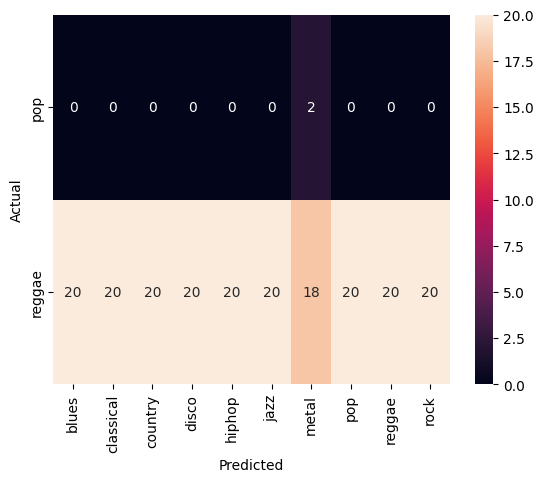

In [35]:
import seaborn as sns
confusion_matrix = pd.crosstab(grid.predict(X_test), y_test,
rownames=['Actual'], colnames=['Predicted'])
#,margins = True)
plt.figure()
sns.heatmap(confusion_matrix, annot=True)
plt.show()

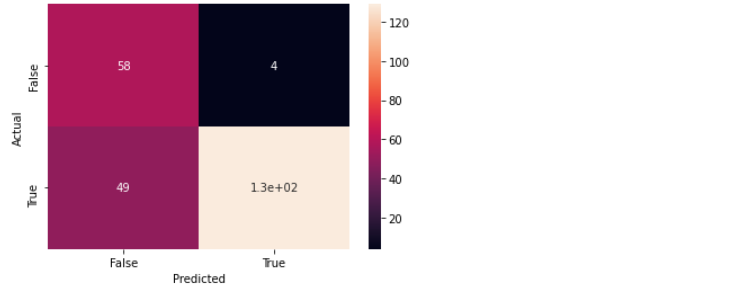

Total 49 files which are actually Potter song is misclassified as Starwars song and similarly 4 Starwars songs are being predicted as Potter Songs.

# Random forest

In [83]:
pip install seaborn --user

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


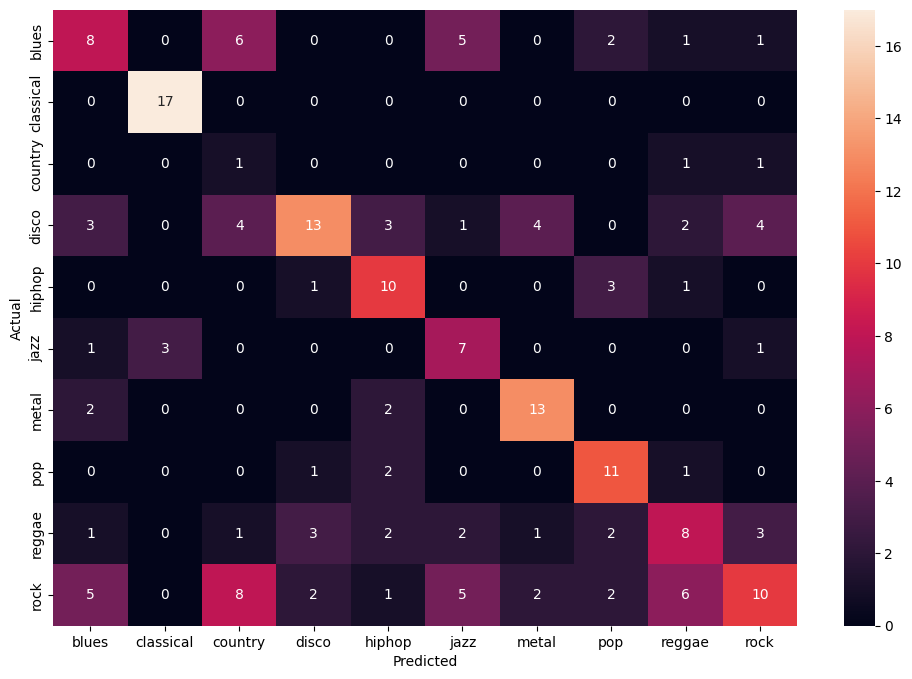

Training Accuracy 0.99875
Validation  Accuracy 0.72


In [36]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

clf = RandomForestClassifier()
confusion_matrix = pd.crosstab(grid.predict(X_test_scaled), y_test,
rownames=['Actual'], colnames=['Predicted'])
#,margins = True)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

clf.fit(X_train_scaled, y_train)

yt_pred6 = clf.predict(X_train_scaled)
yv_pred6 = clf.predict(X_test_scaled)

print('Training Accuracy', np.mean(yt_pred6==y_train))
print('Validation  Accuracy', np.mean(yv_pred6==y_test))

around 200 values very predicted as a different genre here

# Random forest with Hyper parameter Tuning

In [37]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10,20,30],
    "max_features":[1,3,2],
    "random_state":[0,1,2]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

print(grid.best_params_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=10, max_features=1, n_estimators=100, random_state=0;, score=0.662 total time=   0.4s
[CV 2/5] END max_depth=10, max_features=1, n_estimators=100, random_state=0;, score=0.662 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=1, n_estimators=100, random_state=0;, score=0.650 total time=   0.4s
[CV 4/5] END max_depth=10, max_features=1, n_estimators=100, random_state=0;, score=0.644 total time=   0.5s
[CV 5/5] END max_depth=10, max_features=1, n_estimators=100, random_state=0;, score=0.731 total time=   0.4s
[CV 1/5] END max_depth=10, max_features=1, n_estimators=100, random_state=1;, score=0.688 total time=   0.5s
[CV 2/5] END max_depth=10, max_features=1, n_estimators=100, random_state=1;, score=0.644 total time=   0.6s
[CV 3/5] END max_depth=10, max_features=1, n_estimators=100, random_state=1;, score=0.625 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=1, n_estimators=100, rando

In [39]:
grid_predictions_T = grid.predict(X_train_scaled)
grid_predictions = grid.predict(X_test_scaled)


print('Training Accuracy', np.mean(grid_predictions_T == y_train))
print('Validation Accuracy', np.mean(grid_predictions == y_test))

Training Accuracy 0.99875
Validation Accuracy 0.73


In [40]:
import tensorflow
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
#ANN
classifier = Sequential()
classifier.add(Dense(units = 40, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train_scaled, y_train, batch_size = 10, epochs = 100,verbose = 2)

In [ ]:
score, acc = classifier.evaluate(X_train_scaled, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score_test, acc_test = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score_test)
print('Test accuracy:', acc_test)

In [48]:
y_train

35     blues
88     blues
19     blues
29     blues
31     blues
       ...  
57    reggae
83    reggae
17    reggae
92    reggae
66    reggae
Name: label, Length: 800, dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains your target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [50]:
from keras.utils import to_categorical

# Assuming y_train contains your target labels
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)
y_train_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [51]:
classifier.fit(X_train_scaled, y_train_one_hot, batch_size = 10, epochs = 100,verbose = 2)

Epoch 1/100
80/80 - 3s - 39ms/step - accuracy: 0.2675 - loss: 2.2219
Epoch 2/100
80/80 - 0s - 3ms/step - accuracy: 0.3137 - loss: 1.7347
Epoch 3/100
80/80 - 0s - 3ms/step - accuracy: 0.3925 - loss: 1.5380
Epoch 4/100
80/80 - 0s - 4ms/step - accuracy: 0.4712 - loss: 1.3737
Epoch 5/100
80/80 - 0s - 4ms/step - accuracy: 0.5400 - loss: 1.2289
Epoch 6/100
80/80 - 0s - 3ms/step - accuracy: 0.5888 - loss: 1.1294
Epoch 7/100
80/80 - 0s - 3ms/step - accuracy: 0.6100 - loss: 1.0641
Epoch 8/100
80/80 - 0s - 3ms/step - accuracy: 0.6162 - loss: 1.0110
Epoch 9/100
80/80 - 0s - 3ms/step - accuracy: 0.6438 - loss: 0.9659
Epoch 10/100
80/80 - 0s - 3ms/step - accuracy: 0.6463 - loss: 0.9150
Epoch 11/100
80/80 - 0s - 3ms/step - accuracy: 0.6775 - loss: 0.8782
Epoch 12/100
80/80 - 0s - 3ms/step - accuracy: 0.6888 - loss: 0.8431
Epoch 13/100
80/80 - 0s - 3ms/step - accuracy: 0.7188 - loss: 0.8069
Epoch 14/100
80/80 - 0s - 3ms/step - accuracy: 0.7212 - loss: 0.7768
Epoch 15/100
80/80 - 0s - 4ms/step - accur

In [52]:
score, acc = classifier.evaluate(X_train_scaled, y_train_one_hot,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

print('*'*20)
score_test, acc_test = classifier.evaluate(X_test_scaled, y_test_one_hot,
                            batch_size=10)
print('Test score:', score_test)
print('Test accuracy:', acc_test)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0101
Train score: 0.01471251342445612
Train accuracy: 0.9987499713897705
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
********************
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6694 - loss: 3.2841 
Test score: 2.555020570755005
Test accuracy: 0.699999988079071


# 8 Results

A single file was chosen at random from set of 35 files. Its name was displayed ahead of time to see if the model predicted correctly when an unknown file was provided. This was then sent through to the best model's predict function. It accurately predicted the outcome !!

In [ ]:
X_t = getXy(test, scale_audio=True, onlySingleDigit=True)
yt_p = model.predict(X_t)
    print(Genre)

# Manually checked if its correct . Yes!! it was.